In [1]:
# importing of libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading of data
data = pd.read_excel('data_LS.xlsx')

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Basic Checks

In [4]:
# prints first 5 rows of the data
data.head()

,State,Year,Literacy (M),Literacy (F),Literacy (Average),Sex Ratio (Urban),Sex Ratio (Rural)
0,Jammu and Kashmir,2019,76.8,56.4,66.60,840,908
1,Himachal Pradesh,2019,89.5,75.9,82.70,853,986
2,Punjab,2019,80.4,70.7,75.55,875,907
3,Chandigarh,2019,80.3,60.2,70.25,956,1001
4,Uttarakhand,2019,87.4,70.1,78.75,884,1000


In [5]:
# prints last5 rows of the data
data.tail()

,State,Year,Literacy (M),Literacy (F),Literacy (Average),Sex Ratio (Urban),Sex Ratio (Rural)
106,Puducherry,2021,92.1,81.7,86.90,1040,1051
107,Andaman and Nicobar Islands,2021,91.1,83.1,87.10,883,902
108,Telangana,2021,77.1,62.4,69.75,997,939
109,Andhra Pradesh,2021,75.8,60.2,68.00,990,996
110,Ladakh,2021,86.7,70.6,78.65,971,990


In [6]:
# used to view some basic statistical details like percentile, mean, std etc
data.describe()

,Year,Literacy (M),Literacy (F),Literacy (Average),Sex Ratio (Urban),Sex Ratio (Rural)
count,111.0000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,2020.0000,84.168468,70.303604,77.236036,934.351351,940.729730
std,0.8202,6.603140,10.716240,8.460929,57.156189,89.229219
min,2019.0000,71.200000,51.500000,61.350000,840.000000,550.000000
25%,2019.0000,78.550000,60.700000,70.000000,887.500000,921.000000
50%,2020.0000,83.600000,70.500000,76.250000,920.000000,955.000000
75%,2021.0000,90.200000,76.900000,83.475000,969.000000,988.000000
max,2021.0000,96.900000,92.600000,94.750000,1091.000000,1079.000000


In [7]:
# to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               111 non-null    object 
 1   Year                111 non-null    int64  
 2   Literacy (M)        111 non-null    float64
 3   Literacy (F)        111 non-null    float64
 4   Literacy (Average)  111 non-null    float64
 5   Sex Ratio (Urban)   111 non-null    int64  
 6   Sex Ratio (Rural)   111 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 6.2+ KB


In [8]:
# it shows the number columns and rows that data consists
data.shape

(111, 7)

In [9]:
# displays all the columns
data.columns

Index(['State', 'Year', 'Literacy (M)', 'Literacy (F)', 'Literacy (Average)',
       'Sex Ratio (Urban)', 'Sex Ratio (Rural)'],
      dtype='object')

## Data Preprocessing

In [3]:
# These are the new columns
## the columns from the original can be renamed at our convinience
data=data.rename(columns={'Sex Ratio (Urban)':'Sex_Ratio_Urban', 
                          'Sex Ratio (Rural)':'Sex_Ratio_Rural',
                          'Literacy (M)':'Literacy_M',
                          'Literacy (F)':'Literacy_F',
                          'Literacy (Average)':'Literacy_Average'
                         })

In [11]:
data.columns

Index(['State', 'Year', 'Literacy_M', 'Literacy_F', 'Literacy_Average',
       'Sex_Ratio_Urban', 'Sex_Ratio_Rural'],
      dtype='object')

In [12]:
#checking null values
data.isnull().values.any()

False

In [13]:
data.isnull().sum()

State               0
Year                0
Literacy_M          0
Literacy_F          0
Literacy_Average    0
Sex_Ratio_Urban     0
Sex_Ratio_Rural     0
dtype: int64

In [14]:
data.isna().any()

State               False
Year                False
Literacy_M          False
Literacy_F          False
Literacy_Average    False
Sex_Ratio_Urban     False
Sex_Ratio_Rural     False
dtype: bool

### Value count and unique in columns

In [15]:
data.columns

Index(['State', 'Year', 'Literacy_M', 'Literacy_F', 'Literacy_Average',
       'Sex_Ratio_Urban', 'Sex_Ratio_Rural'],
      dtype='object')

In [16]:
data.State.value_counts()

Madhya Pradesh                 3
Uttarakhand                    3
Nagaland                       3
Manipur                        3
Andaman and Nicobar Islands    3
Chhattisgarh                   3
Gujarat                        3
Assam                          3
Maharashtra                    3
Punjab                         3
Tripura                        3
Andhra Pradesh                 3
Mizoram                        3
Kerala                         3
Arunachal Pradesh              3
Puducherry                     3
Telangana                      3
Tamil Nadu                     3
Sikkim                         3
Bihar                          3
Karnataka                      3
Dadra and Nagar Haveli         3
Uttar Pradesh                  3
Meghalaya                      3
Delhi                          3
Chandigarh                     3
Himachal Pradesh               3
Goa                            3
Haryana                        3
Odisha                         3
Jharkhand 

In [17]:
data.State.unique()

array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Bihar', 'Sikkim', 'Arunachal Pradesh', 'Nagaland', 'Manipur',
       'Mizoram', 'Tripura', 'Meghalaya', 'Assam', 'West Bengal',
       'Jharkhand', 'Odisha', 'Chhattisgarh', 'Madhya Pradesh', 'Gujarat',
       'Daman and Diu', 'Dadra and Nagar Haveli', 'Maharashtra',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Puducherry', 'Andaman and Nicobar Islands', 'Telangana',
       'Andhra Pradesh', 'Ladakh'], dtype=object)

In [18]:
data.Year.value_counts()

2019    37
2020    37
2021    37
Name: Year, dtype: int64

In [19]:
data.Year.unique()

array([2019, 2020, 2021], dtype=int64)

In [20]:
data.Literacy_M.value_counts()

80.3    2
92.1    2
80.9    2
76.7    2
82.8    2
80.6    2
85.7    2
91.5    2
91.8    2
76.8    2
86.1    2
77.7    2
84.3    1
82.3    1
83.6    1
82.4    1
96.2    1
83.3    1
85.2    1
78.1    1
88.4    1
91.4    1
84.8    1
81.9    1
86.4    1
93.7    1
77.1    1
93.3    1
90.9    1
90.1    1
86.7    1
88.2    1
95.6    1
73.2    1
76.1    1
81.6    1
76.4    1
83.1    1
83.9    1
91.1    1
86.6    1
86.8    1
92.7    1
84.5    1
96.1    1
78.2    1
88.8    1
81.2    1
89.2    1
72.0    1
71.2    1
80.8    1
76.3    1
78.7    1
93.2    1
79.3    1
83.5    1
80.4    1
78.4    1
90.3    1
92.9    1
91.3    1
74.9    1
75.4    1
82.0    1
90.4    1
87.2    1
79.1    1
77.8    1
89.5    1
77.4    1
77.0    1
96.8    1
92.6    1
79.8    1
72.9    1
86.2    1
87.5    1
75.8    1
77.3    1
79.5    1
72.6    1
94.1    1
81.7    1
71.7    1
79.2    1
84.1    1
82.5    1
77.5    1
96.9    1
86.9    1
90.7    1
87.1    1
92.2    1
77.2    1
96.6    1
87.4    1
85.8    1
91.7    1
Name: Lite

In [21]:
data.Literacy_F.value_counts()

60.2    4
75.9    3
70.1    3
70.7    3
52.1    2
80.7    2
61.1    2
76.9    2
76.6    2
82.7    2
70.5    2
71.3    2
71.0    2
57.6    2
60.7    2
73.4    2
55.4    1
59.2    1
92.6    1
87.9    1
68.8    1
56.7    1
89.3    1
74.1    1
92.4    1
64.9    1
73.6    1
81.8    1
70.6    1
62.4    1
80.8    1
85.5    1
64.5    1
83.1    1
67.2    1
56.1    1
81.7    1
76.1    1
64.0    1
76.2    1
66.5    1
85.1    1
73.1    1
81.3    1
80.1    1
65.7    1
59.1    1
76.3    1
90.0    1
79.5    1
68.1    1
55.7    1
68.5    1
57.0    1
65.9    1
83.5    1
81.2    1
56.4    1
69.7    1
75.6    1
70.3    1
52.4    1
58.5    1
72.9    1
51.5    1
66.2    1
76.5    1
59.8    1
61.7    1
52.6    1
69.6    1
53.0    1
65.1    1
88.8    1
57.2    1
88.2    1
92.1    1
89.7    1
83.2    1
62.0    1
66.8    1
66.3    1
58.1    1
57.7    1
59.9    1
84.7    1
82.4    1
70.9    1
64.3    1
58.0    1
Name: Literacy_F, dtype: int64

In [22]:
data.Literacy_Average.value_counts()

67.65    3
71.00    2
69.75    2
70.65    2
74.75    2
67.25    2
78.10    2
86.70    2
75.65    2
77.65    2
87.10    2
70.25    2
80.10    2
86.35    2
66.60    1
80.80    1
66.40    1
73.60    1
75.55    1
69.35    1
68.95    1
65.65    1
62.20    1
76.25    1
75.00    1
86.00    1
67.00    1
75.05    1
61.35    1
76.95    1
81.40    1
76.85    1
68.10    1
86.10    1
69.45    1
66.05    1
74.50    1
92.20    1
72.80    1
80.05    1
75.95    1
65.15    1
65.85    1
66.75    1
92.05    1
86.80    1
81.75    1
88.65    1
68.00    1
89.35    1
76.45    1
87.85    1
61.90    1
87.50    1
89.00    1
66.10    1
91.30    1
86.90    1
72.05    1
73.20    1
82.15    1
81.10    1
86.45    1
72.80    1
94.75    1
77.75    1
83.65    1
66.95    1
94.10    1
65.50    1
78.45    1
69.00    1
76.10    1
92.80    1
91.75    1
82.70    1
78.75    1
77.30    1
85.50    1
75.90    1
75.35    1
79.45    1
72.45    1
75.30    1
94.50    1
82.50    1
75.95    1
75.40    1
82.90    1
79.45    1
83.30    1

In [23]:
data.Sex_Ratio_Urban.value_counts()

1001    3
959     3
877     3
873     3
1000    3
998     3
1091    3
963     3
1026    3
896     2
967     2
956     2
961     2
867     2
853     2
858     2
997     2
880     2
884     2
889     2
953     2
895     2
914     2
898     2
912     2
910     2
918     2
944     1
875     1
990     1
863     1
975     1
996     1
913     1
871     1
909     1
908     1
987     1
878     1
907     1
882     1
883     1
903     1
1040    1
886     1
1029    1
890     1
894     1
989     1
855     1
915     1
920     1
946     1
947     1
949     1
950     1
954     1
955     1
934     1
932     1
923     1
958     1
919     1
936     1
917     1
840     1
901     1
971     1
973     1
847     1
849     1
978     1
852     1
1035    1
965     1
Name: Sex_Ratio_Urban, dtype: int64

In [24]:
data.Sex_Ratio_Rural.value_counts()

955     5
996     4
979     3
987     3
957     3
989     3
1003    3
1000    2
986     2
953     2
952     2
1079    2
949     2
944     2
942     2
936     2
958     2
1001    2
921     2
908     2
910     2
1002    2
919     2
882     2
940     2
1004    2
1047    1
980     1
981     1
983     1
985     1
891     1
890     1
889     1
994     1
972     1
886     1
885     1
867     1
990     1
879     1
991     1
993     1
939     1
934     1
971     1
969     1
1051    1
902     1
907     1
935     1
912     1
1043    1
918     1
923     1
925     1
933     1
550     1
875     1
684     1
938     1
555     1
559     1
689     1
950     1
1078    1
954     1
956     1
897     1
960     1
961     1
695     1
963     1
965     1
951     1
Name: Sex_Ratio_Rural, dtype: int64

In [25]:
data.head()

,State,Year,Literacy_M,Literacy_F,Literacy_Average,Sex_Ratio_Urban,Sex_Ratio_Rural
0,Jammu and Kashmir,2019,76.8,56.4,66.60,840,908
1,Himachal Pradesh,2019,89.5,75.9,82.70,853,986
2,Punjab,2019,80.4,70.7,75.55,875,907
3,Chandigarh,2019,80.3,60.2,70.25,956,1001
4,Uttarakhand,2019,87.4,70.1,78.75,884,1000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             111 non-null    object 
 1   Year              111 non-null    int64  
 2   Literacy_M        111 non-null    float64
 3   Literacy_F        111 non-null    float64
 4   Literacy_Average  111 non-null    float64
 5   Sex_Ratio_Urban   111 non-null    int64  
 6   Sex_Ratio_Rural   111 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 6.2+ KB


In [27]:
data.describe(include=['object'])

,State
count,111
unique,37
top,Madhya Pradesh
freq,3


In [28]:
data.describe(include=['integer'])

,Year,Sex_Ratio_Urban,Sex_Ratio_Rural
count,111.0000,111.000000,111.000000
mean,2020.0000,934.351351,940.729730
std,0.8202,57.156189,89.229219
min,2019.0000,840.000000,550.000000
25%,2019.0000,887.500000,921.000000
50%,2020.0000,920.000000,955.000000
75%,2021.0000,969.000000,988.000000
max,2021.0000,1091.000000,1079.000000


In [29]:
data.describe(include=['float'])

,Literacy_M,Literacy_F,Literacy_Average
count,111.000000,111.000000,111.000000
mean,84.168468,70.303604,77.236036
std,6.603140,10.716240,8.460929
min,71.200000,51.500000,61.350000
25%,78.550000,60.700000,70.000000
50%,83.600000,70.500000,76.250000
75%,90.200000,76.900000,83.475000
max,96.900000,92.600000,94.750000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             111 non-null    object 
 1   Year              111 non-null    int64  
 2   Literacy_M        111 non-null    float64
 3   Literacy_F        111 non-null    float64
 4   Literacy_Average  111 non-null    float64
 5   Sex_Ratio_Urban   111 non-null    int64  
 6   Sex_Ratio_Rural   111 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 6.2+ KB


In [31]:
data.head()

,State,Year,Literacy_M,Literacy_F,Literacy_Average,Sex_Ratio_Urban,Sex_Ratio_Rural
0,Jammu and Kashmir,2019,76.8,56.4,66.60,840,908
1,Himachal Pradesh,2019,89.5,75.9,82.70,853,986
2,Punjab,2019,80.4,70.7,75.55,875,907
3,Chandigarh,2019,80.3,60.2,70.25,956,1001
4,Uttarakhand,2019,87.4,70.1,78.75,884,1000


# Exploratory Data Analysis

<AxesSubplot:xlabel='Literacy_M'>

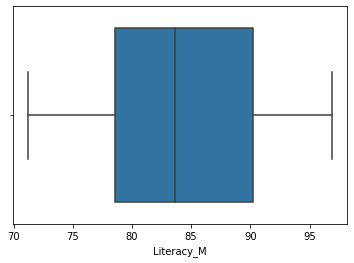

In [33]:
sns.boxplot(data.Literacy_M)

<AxesSubplot:xlabel='Literacy_F'>

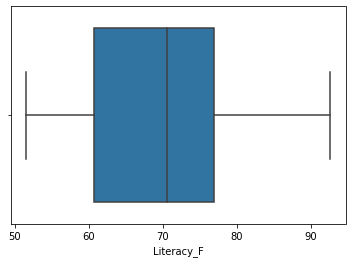

In [34]:
sns.boxplot(data.Literacy_F)

<AxesSubplot:xlabel='Literacy_Average'>

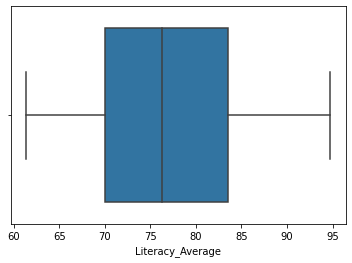

In [35]:
sns.boxplot(data.Literacy_Average)

<AxesSubplot:xlabel='Sex_Ratio_Urban'>

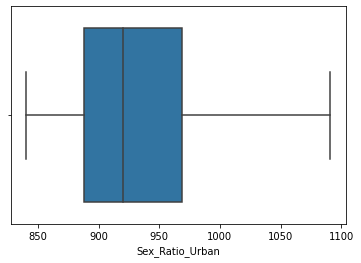

In [36]:
sns.boxplot(data.Sex_Ratio_Urban)

<AxesSubplot:xlabel='Sex_Ratio_Rural'>

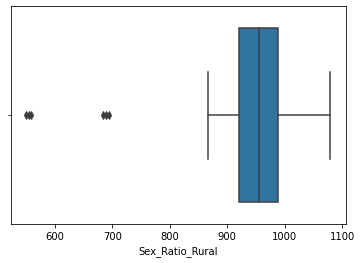

In [37]:
sns.boxplot(data.Sex_Ratio_Rural)

### Univariate Analysis

In [38]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data,title="Pandas Profiling Report", minimal=True)
profile.to_widgets()
profile.to_file("L&S_Pandas_Profiling_Report.html")

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
data.columns

Index(['State', 'Year', 'Literacy_M', 'Literacy_F', 'Literacy_Average',
       'Sex_Ratio_Urban', 'Sex_Ratio_Rural'],
      dtype='object')

### Literacy_M 

In [41]:
avg = data['Literacy_M'].mean()
print(str(avg) + " is the Average Literacy_M ")

84.16846846846849 is the Average Literacy_M 


In [42]:
total_Literacy_M=data['Literacy_M'].sum()
total_Literacy_M  

9342.7

In [43]:
#lowest Male Literacy states
data.sort_values(by = 'Literacy_M' , ascending = True).head()

,State,Year,Literacy_M,Literacy_F,Literacy_Average,Sex_Ratio_Urban,Sex_Ratio_Rural
9,Bihar,2019,71.2,51.5,61.35,895,921
46,Bihar,2020,71.7,52.1,61.90,898,923
83,Bihar,2021,72.0,52.4,62.20,901,925
11,Arunachal Pradesh,2019,72.6,57.7,65.15,890,953
48,Arunachal Pradesh,2020,72.9,58.1,65.50,895,955


In [7]:
#Highest Male Literacy states
data.sort_values(by = 'Literacy_M' , ascending = False)

,State,Year,Literacy_M,Literacy_F,Literacy_Average,Sex_Ratio_Urban,Sex_Ratio_Rural
104,Kerala,2021,96.9,92.6,94.75,1091,1079
103,Lakshadweep,2021,96.8,88.8,92.80,963,954
67,Kerala,2020,96.6,92.4,94.50,1091,1079
66,Lakshadweep,2020,96.2,88.2,92.20,959,950
30,Kerala,2019,96.1,92.1,94.10,1091,1078
29,Lakshadweep,2019,95.6,87.9,91.75,954,944
88,Mizoram,2021,94.1,90.0,92.05,998,957
51,Mizoram,2020,93.7,89.7,91.70,998,955
14,Mizoram,2019,93.3,89.3,91.30,998,952
102,Goa,2021,93.2,85.5,89.35,958,1004


<AxesSubplot:xlabel='Literacy_M', ylabel='Density'>

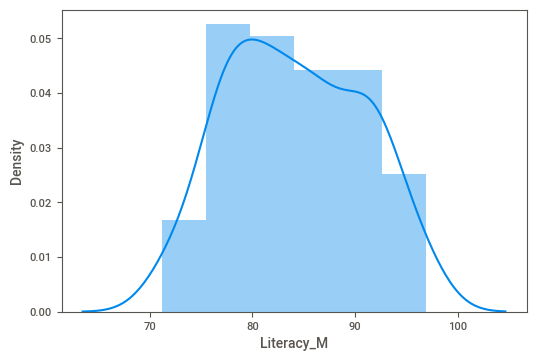

In [45]:
## ANalsyzing Literacy_M
sns.distplot(data.Literacy_M)
## Normal distribution

### Literacy_F

In [46]:
avg = data['Literacy_F'].mean()
print(str(avg) + " is the Average Literacy_F ")

70.3036036036036 is the Average Literacy_F 


In [47]:
total_Literacy_F = data['Literacy_F'].sum()
total_Literacy_F  

7803.700000000001

In [48]:
#lowest Female Literacy states
data.sort_values(by = 'Literacy_F' , ascending = True).head()

,State,Year,Literacy_M,Literacy_F,Literacy_Average,Sex_Ratio_Urban,Sex_Ratio_Rural
9,Bihar,2019,71.2,51.5,61.35,895,921
46,Bihar,2020,71.7,52.1,61.90,898,923
7,Rajasthan,2019,79.2,52.1,65.65,914,933
83,Bihar,2021,72.0,52.4,62.20,901,925
44,Rajasthan,2020,79.5,52.6,66.05,917,935


In [49]:
#lowest Female Literacy states
data.sort_values(by = 'Literacy_F' , ascending = False).head()

,State,Year,Literacy_M,Literacy_F,Literacy_Average,Sex_Ratio_Urban,Sex_Ratio_Rural
104,Kerala,2021,96.9,92.6,94.75,1091,1079
67,Kerala,2020,96.6,92.4,94.50,1091,1079
30,Kerala,2019,96.1,92.1,94.10,1091,1078
88,Mizoram,2021,94.1,90.0,92.05,998,957
51,Mizoram,2020,93.7,89.7,91.70,998,955


<AxesSubplot:xlabel='Literacy_F', ylabel='Density'>

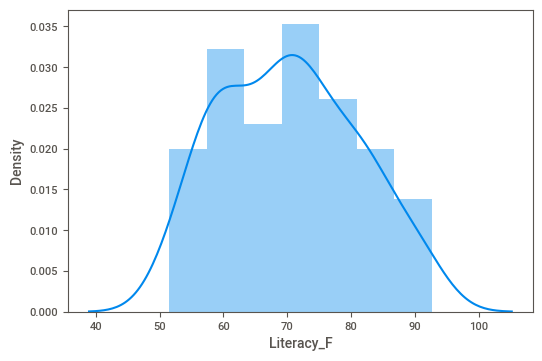

In [50]:
## ANalsyzing Literacy_F
sns.distplot(data.Literacy_F)
## Not Normal distribution

### Literacy_Average

In [51]:
avg = data['Literacy_Average'].mean()
print(str(avg) + " is the Average Literacy_Average")

77.23603603603604 is the Average Literacy_Average


In [52]:
total_Literacy_Average=data['Literacy_Average'].sum()
total_Literacy_Average   

8573.2

In [53]:
#lowest Literacy AVG for states
data.sort_values(by = 'Literacy_Average' , ascending = True).head()

,State,Year,Literacy_M,Literacy_F,Literacy_Average,Sex_Ratio_Urban,Sex_Ratio_Rural
9,Bihar,2019,71.2,51.5,61.35,895,921
46,Bihar,2020,71.7,52.1,61.90,898,923
83,Bihar,2021,72.0,52.4,62.20,901,925
11,Arunachal Pradesh,2019,72.6,57.7,65.15,890,953
48,Arunachal Pradesh,2020,72.9,58.1,65.50,895,955


In [54]:
#Highest Literacy AVG for states
data.sort_values(by = 'Literacy_Average' , ascending = False).head()

,State,Year,Literacy_M,Literacy_F,Literacy_Average,Sex_Ratio_Urban,Sex_Ratio_Rural
104,Kerala,2021,96.9,92.6,94.75,1091,1079
67,Kerala,2020,96.6,92.4,94.50,1091,1079
30,Kerala,2019,96.1,92.1,94.10,1091,1078
103,Lakshadweep,2021,96.8,88.8,92.80,963,954
66,Lakshadweep,2020,96.2,88.2,92.20,959,950


<AxesSubplot:xlabel='Literacy_Average', ylabel='Density'>

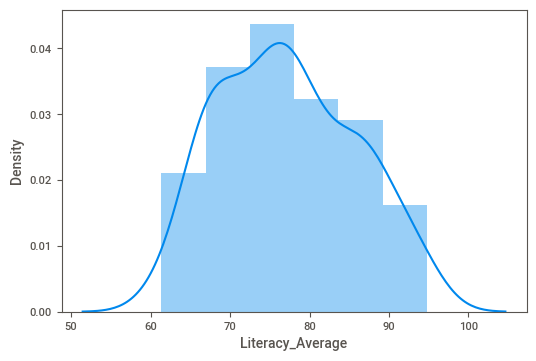

In [55]:
## ANalsyzing Literacy_Average
sns.distplot(data.Literacy_Average)
## Normal distribution

### Sex_Ratio_Urban

In [56]:
avg = data['Sex_Ratio_Urban'].mean()
print(str(avg) + " is the Average Sex_Ratio_Urban ")

934.3513513513514 is the Average Sex_Ratio_Urban 


In [57]:
total_Sex_Ratio_Urban=data['Sex_Ratio_Urban'].sum()
total_Sex_Ratio_Urban   

103713

In [58]:
#lowest Sex_Ratio_Urban  for states
data.sort_values(by = 'Sex_Ratio_Urban' , ascending = True).head()

,State,Year,Literacy_M,Literacy_F,Literacy_Average,Sex_Ratio_Urban,Sex_Ratio_Rural
0,Jammu and Kashmir,2019,76.8,56.4,66.60,840,908
6,Delhi,2019,90.9,80.8,85.85,847,867
37,Jammu and Kashmir,2020,77.2,56.7,66.95,849,910
74,Jammu and Kashmir,2021,77.5,57.0,67.25,852,912
1,Himachal Pradesh,2019,89.5,75.9,82.70,853,986


In [59]:
#Highest Sex_Ratio_Urban for states
data.sort_values(by = 'Sex_Ratio_Urban' , ascending = False).head()

,State,Year,Literacy_M,Literacy_F,Literacy_Average,Sex_Ratio_Urban,Sex_Ratio_Rural
104,Kerala,2021,96.9,92.6,94.75,1091,1079
67,Kerala,2020,96.6,92.4,94.50,1091,1079
30,Kerala,2019,96.1,92.1,94.10,1091,1078
106,Puducherry,2021,92.1,81.7,86.90,1040,1051
69,Puducherry,2020,91.7,81.2,86.45,1035,1047


<AxesSubplot:xlabel='Sex_Ratio_Urban', ylabel='Density'>

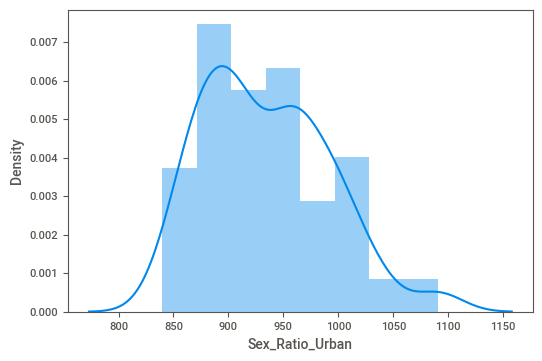

In [60]:
## ANalsyzing Sex_Ratio_Urban
sns.distplot(data.Sex_Ratio_Urban)
## Normal distribution

### Sex_Ratio_Rural

In [61]:
avg = data['Sex_Ratio_Rural'].mean()
print(str(avg) + " is the Average Sex_Ratio_Rural ")

940.7297297297297 is the Average Sex_Ratio_Rural 


In [62]:
total_Sex_Ratio_Rural=data['Sex_Ratio_Rural'].sum()
total_Sex_Ratio_Rural   

104421

In [63]:
#lowest Sex_Ratio_Rural  for states
data.sort_values(by = 'Sex_Ratio_Rural' , ascending = True).head()

,State,Year,Literacy_M,Literacy_F,Literacy_Average,Sex_Ratio_Urban,Sex_Ratio_Rural
24,Daman and Diu,2019,91.5,79.5,85.50,867,550
61,Daman and Diu,2020,92.1,80.1,86.10,873,555
98,Daman and Diu,2021,92.7,80.7,86.70,877,559
25,Dadra and Nagar Haveli,2019,85.2,64.3,74.75,863,684
62,Dadra and Nagar Haveli,2020,85.7,65.1,75.40,867,689


In [64]:
#Highest Sex_Ratio_Rural for states
data.sort_values(by = 'Sex_Ratio_Rural' , ascending = False).head()

,State,Year,Literacy_M,Literacy_F,Literacy_Average,Sex_Ratio_Urban,Sex_Ratio_Rural
67,Kerala,2020,96.6,92.4,94.50,1091,1079
104,Kerala,2021,96.9,92.6,94.75,1091,1079
30,Kerala,2019,96.1,92.1,94.10,1091,1078
106,Puducherry,2021,92.1,81.7,86.90,1040,1051
69,Puducherry,2020,91.7,81.2,86.45,1035,1047


<AxesSubplot:xlabel='Sex_Ratio_Rural', ylabel='Density'>

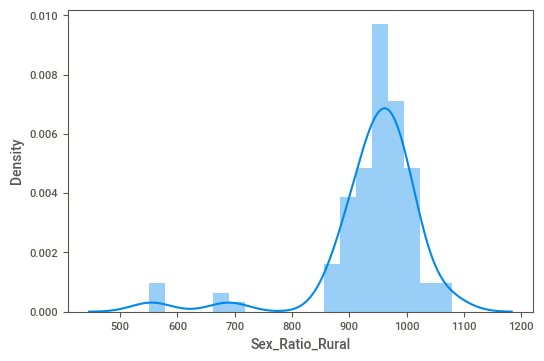

In [65]:
## ANalsyzing Sex_Ratio_Rural
sns.distplot(data.Sex_Ratio_Rural)
## left skewed distribution

### State

In [66]:
statewise_gst=data.groupby('State').Literacy_M.sum() 
statewise_gst.sort_values(ascending=False)

State
Kerala                         289.6
Lakshadweep                    288.6
Mizoram                        281.1
Goa                            278.7
Daman and Diu                  276.3
Tripura                        275.5
Puducherry                     275.1
Delhi                          274.1
Andaman and Nicobar Islands    272.1
Himachal Pradesh               270.0
Maharashtra                    266.4
Tamil Nadu                     261.4
Sikkim                         260.7
Ladakh                         258.5
Gujarat                        258.3
Dadra and Nagar Haveli         257.1
Haryana                        253.4
Uttarakhand                    253.3
Manipur                        251.8
Nagaland                       249.6
Karnataka                      248.4
West Bengal                    246.1
Odisha                         245.8
Punjab                         242.4
Chhattisgarh                   241.8
Chandigarh                     241.8
Rajasthan                      2

In [67]:
statewise_gst=data.groupby('State').Literacy_M.mean() 
statewise_gst.sort_values(ascending=False)

State
Kerala                         96.533333
Lakshadweep                    96.200000
Mizoram                        93.700000
Goa                            92.900000
Daman and Diu                  92.100000
Tripura                        91.833333
Puducherry                     91.700000
Delhi                          91.366667
Andaman and Nicobar Islands    90.700000
Himachal Pradesh               90.000000
Maharashtra                    88.800000
Tamil Nadu                     87.133333
Sikkim                         86.900000
Ladakh                         86.166667
Gujarat                        86.100000
Dadra and Nagar Haveli         85.700000
Haryana                        84.466667
Uttarakhand                    84.433333
Manipur                        83.933333
Nagaland                       83.200000
Karnataka                      82.800000
West Bengal                    82.033333
Odisha                         81.933333
Punjab                         80.800000
Chhattisga

In [68]:
statewise_gst=data.groupby('State').Literacy_F.sum() 
statewise_gst.sort_values(ascending=False)

State
Kerala                         277.1
Mizoram                        269.0
Lakshadweep                    264.9
Goa                            255.3
Tripura                        249.4
Andaman and Nicobar Islands    248.2
Delhi                          243.9
Puducherry                     243.6
Daman and Diu                  240.3
Nagaland                       229.6
Himachal Pradesh               229.3
Maharashtra                    228.7
Sikkim                         227.8
Tamil Nadu                     221.1
Meghalaya                      219.4
Punjab                         213.0
West Bengal                    212.7
Manipur                        212.0
Gujarat                        210.3
Ladakh                         210.3
Karnataka                      205.4
Assam                          200.3
Haryana                        198.6
Uttarakhand                    198.4
Dadra and Nagar Haveli         195.1
Odisha                         193.4
Telangana                      1

In [69]:
statewise_gst=data.groupby('State').Literacy_F.mean() 
statewise_gst.sort_values(ascending=False)

State
Kerala                         92.366667
Mizoram                        89.666667
Lakshadweep                    88.300000
Goa                            85.100000
Tripura                        83.133333
Andaman and Nicobar Islands    82.733333
Delhi                          81.300000
Puducherry                     81.200000
Daman and Diu                  80.100000
Nagaland                       76.533333
Himachal Pradesh               76.433333
Maharashtra                    76.233333
Sikkim                         75.933333
Tamil Nadu                     73.700000
Meghalaya                      73.133333
Punjab                         71.000000
West Bengal                    70.900000
Manipur                        70.666667
Gujarat                        70.100000
Ladakh                         70.100000
Karnataka                      68.466667
Assam                          66.766667
Haryana                        66.200000
Uttarakhand                    66.133333
Dadra and 

In [70]:
statewise_gst=data.groupby('State').Literacy_Average.sum() 
statewise_gst.sort_values(ascending=False)

State
Kerala                         283.35
Lakshadweep                    276.75
Mizoram                        275.05
Goa                            267.00
Tripura                        262.45
Andaman and Nicobar Islands    260.15
Puducherry                     259.35
Delhi                          259.00
Daman and Diu                  258.30
Himachal Pradesh               249.65
Maharashtra                    247.55
Sikkim                         244.25
Tamil Nadu                     241.25
Nagaland                       239.60
Ladakh                         234.40
Gujarat                        234.30
Manipur                        231.90
West Bengal                    229.40
Punjab                         227.70
Karnataka                      226.90
Dadra and Nagar Haveli         226.10
Haryana                        226.00
Uttarakhand                    225.85
Meghalaya                      224.30
Odisha                         219.60
Assam                          217.30
Chhatt

In [71]:
statewise_gst=data.groupby('State').Literacy_Average.mean() 
statewise_gst.sort_values(ascending=False)

State
Kerala                         94.450000
Lakshadweep                    92.250000
Mizoram                        91.683333
Goa                            89.000000
Tripura                        87.483333
Andaman and Nicobar Islands    86.716667
Puducherry                     86.450000
Delhi                          86.333333
Daman and Diu                  86.100000
Himachal Pradesh               83.216667
Maharashtra                    82.516667
Sikkim                         81.416667
Tamil Nadu                     80.416667
Nagaland                       79.866667
Ladakh                         78.133333
Gujarat                        78.100000
Manipur                        77.300000
West Bengal                    76.466667
Punjab                         75.900000
Karnataka                      75.633333
Dadra and Nagar Haveli         75.366667
Haryana                        75.333333
Uttarakhand                    75.283333
Meghalaya                      74.766667
Odisha    

In [72]:
statewise_gst=data.groupby('State').Sex_Ratio_Urban.sum() 
statewise_gst.sort_values(ascending=False)

State
Kerala                         3273
Puducherry                     3104
Manipur                        3078
Meghalaya                      3003
Tamil Nadu                     3000
Mizoram                        2994
Telangana                      2990
Andhra Pradesh                 2966
Tripura                        2926
Ladakh                         2901
Karnataka                      2895
Chandigarh                     2876
Chhattisgarh                   2876
Lakshadweep                    2876
Goa                            2866
Assam                          2849
West Bengal                    2840
Odisha                         2802
Madhya Pradesh                 2761
Rajasthan                      2750
Sikkim                         2746
Jharkhand                      2736
Nagaland                       2730
Maharashtra                    2719
Bihar                          2694
Arunachal Pradesh              2683
Uttar Pradesh                  2679
Uttarakhand           

In [73]:
statewise_gst=data.groupby('State').Sex_Ratio_Urban.mean() 
statewise_gst.sort_values(ascending=False)

State
Kerala                         1091.000000
Puducherry                     1034.666667
Manipur                        1026.000000
Meghalaya                      1001.000000
Tamil Nadu                     1000.000000
Mizoram                         998.000000
Telangana                       996.666667
Andhra Pradesh                  988.666667
Tripura                         975.333333
Ladakh                          967.000000
Karnataka                       965.000000
Chandigarh                      958.666667
Chhattisgarh                    958.666667
Lakshadweep                     958.666667
Goa                             955.333333
Assam                           949.666667
West Bengal                     946.666667
Odisha                          934.000000
Madhya Pradesh                  920.333333
Rajasthan                       916.666667
Sikkim                          915.333333
Jharkhand                       912.000000
Nagaland                        910.000000
Mahar

In [74]:
statewise_gst=data.groupby('State').Sex_Ratio_Rural.sum() 
statewise_gst.sort_values(ascending=False)

State
Kerala                         3236
Puducherry                     3141
Goa                            3011
Chandigarh                     3006
Chhattisgarh                   3006
Andhra Pradesh                 2988
Tamil Nadu                     2983
Odisha                         2969
Himachal Pradesh               2962
Meghalaya                      2960
Ladakh                         2954
Karnataka                      2942
Jharkhand                      2921
Uttarakhand                    2919
Manipur                        2912
Assam                          2888
Tripura                        2869
West Bengal                    2866
Arunachal Pradesh              2865
Maharashtra                    2864
Mizoram                        2864
Gujarat                        2849
Lakshadweep                    2848
Nagaland                       2826
Madhya Pradesh                 2818
Telangana                      2809
Rajasthan                      2806
Bihar                 

In [75]:
statewise_gst=data.groupby('State').Sex_Ratio_Rural.mean() 
statewise_gst.sort_values(ascending=False)

State
Kerala                         1078.666667
Puducherry                     1047.000000
Goa                            1003.666667
Chandigarh                     1002.000000
Chhattisgarh                   1002.000000
Andhra Pradesh                  996.000000
Tamil Nadu                      994.333333
Odisha                          989.666667
Himachal Pradesh                987.333333
Meghalaya                       986.666667
Ladakh                          984.666667
Karnataka                       980.666667
Jharkhand                       973.666667
Uttarakhand                     973.000000
Manipur                         970.666667
Assam                           962.666667
Tripura                         956.333333
West Bengal                     955.333333
Arunachal Pradesh               955.000000
Maharashtra                     954.666667
Mizoram                         954.666667
Gujarat                         949.666667
Lakshadweep                     949.333333
Nagal

### Year

In [76]:
data.groupby('Year').Literacy_M.sum()

Year
2019    3103.5
2020    3107.9
2021    3131.3
Name: Literacy_M, dtype: float64

In [77]:
data.groupby('Year').Literacy_M.mean()

Year
2019    83.878378
2020    83.997297
2021    84.629730
Name: Literacy_M, dtype: float64

In [78]:
data.groupby('Year').Literacy_F.sum()

Year
2019    2590.1
2020    2593.2
2021    2620.4
Name: Literacy_F, dtype: float64

In [79]:
data.groupby('Year').Literacy_F.mean()

Year
2019    70.002703
2020    70.086486
2021    70.821622
Name: Literacy_F, dtype: float64

In [80]:
data.groupby('Year').Literacy_Average.sum()

Year
2019    2846.80
2020    2850.55
2021    2875.85
Name: Literacy_Average, dtype: float64

In [81]:
data.groupby('Year').Literacy_Average.mean()

Year
2019    76.940541
2020    77.041892
2021    77.725676
Name: Literacy_Average, dtype: float64

In [82]:
data.groupby('Year').Sex_Ratio_Urban.sum()

Year
2019    34466
2020    34586
2021    34661
Name: Sex_Ratio_Urban, dtype: int64

In [83]:
data.groupby('Year').Sex_Ratio_Urban.mean()

Year
2019    931.513514
2020    934.756757
2021    936.783784
Name: Sex_Ratio_Urban, dtype: float64

In [84]:
data.groupby('Year').Sex_Ratio_Rural.sum()

Year
2019    34735
2020    34759
2021    34927
Name: Sex_Ratio_Rural, dtype: int64

In [85]:
data.groupby('Year').Sex_Ratio_Rural.mean()

Year
2019    938.783784
2020    939.432432
2021    943.972973
Name: Sex_Ratio_Rural, dtype: float64

In [86]:
data.columns

Index(['State', 'Year', 'Literacy_M', 'Literacy_F', 'Literacy_Average',
       'Sex_Ratio_Urban', 'Sex_Ratio_Rural'],
      dtype='object')

In [ ]:
data[(data['State'] == 'Maharashtra') &  (data['Year'] == '2021')]